# 광고그룹 분석
- 학습목표 : 
    1. groupby 함수 사용실습
    2. 키워드 분석과정에서 진행한 코딩 복습

### as-is : 키워드 기준 분석
- 키워드의 노출수/클릭수/총비용...

### to-be : 광고그룹 기준 분석
- 데이터의 구성을 광고그룹 기준으로 변경해야 함
- 광고그룹의 노출수/클릭수/총비용...
- groupby 함수 사용 : 전달된 열을 기준으로 전체 데이터를 분류

## 데이터 전처리

In [2]:
import pandas as pd
from pandas import DataFrame
from pandas import Series


In [3]:
df = pd.read_excel("./네이버보고서.xls", skiprows = {0})
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606.0,0.414149,261.549448,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058.0,1.049915,295.974808,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324.0,0.028475,4841.663580,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.6,0.268489,630.593475,1175174
4,3. html,HTML,9626374,813.6,0.008452,1408.435349,1145903


In [4]:
grouped = df.groupby("광고그룹")

In [5]:
grouped

In [7]:
grouped.count()

,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,,
#000_마케팅 전체_main,48,48,48,48,48,48
001.BASIC DESIGN,9,9,9,9,9,9
001.데이터분석/ 통계,10,10,10,10,10,10
002.R,9,9,9,9,9,9
002.UX/UI,5,5,5,5,5,5
...,...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,13,13,13,13,13,13
프로그래밍 유치원,8,8,8,8,8,8
프로그래밍 전체,12,12,12,12,12,12


In [8]:
grouped.mean()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,14780.145833,8.400000,0.183898,625.086295,7243.958333
001.BASIC DESIGN,5738.555556,6.800000,0.232924,298.693822,2427.333333
001.데이터분석/ 통계,3715.000000,20.280000,0.890571,1021.473357,19575.600000
002.R,13413.777778,8.533333,0.111199,360.038462,4796.000000
002.UX/UI,3090.800000,4.080000,0.089340,69.928571,550.000000
...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,72092.692308,16.707692,0.050832,648.327517,15781.615385
프로그래밍 유치원,5921.625000,7.800000,0.224738,2032.326389,23617.000000
프로그래밍 전체,90375.000000,9.200000,0.024037,123.881559,1626.166667


In [9]:
grouped.sum()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,709447,403.2,8.827081,30004.142165,347710
001.BASIC DESIGN,51647,61.2,2.096316,2688.244398,21846
001.데이터분석/ 통계,37150,202.8,8.905710,10214.733573,195756
002.R,120724,76.8,1.000794,3240.346154,43164
002.UX/UI,15454,20.4,0.446702,349.642857,2750
...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,937205,217.2,0.660812,8428.257716,205161
프로그래밍 유치원,47373,62.4,1.797903,16258.611111,188936
프로그래밍 전체,1084500,110.4,0.288445,1486.578704,19514


- 클릭률과 평균 클릭비용에 대한 개산 다시 필요
    - 클릭률의 총합이 아닌 광고그룹에 대한 클릭률

In [10]:
df_group = grouped.sum()

In [11]:
df_group

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,709447,403.2,8.827081,30004.142165,347710
001.BASIC DESIGN,51647,61.2,2.096316,2688.244398,21846
001.데이터분석/ 통계,37150,202.8,8.905710,10214.733573,195756
002.R,120724,76.8,1.000794,3240.346154,43164
002.UX/UI,15454,20.4,0.446702,349.642857,2750
...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,937205,217.2,0.660812,8428.257716,205161
프로그래밍 유치원,47373,62.4,1.797903,16258.611111,188936
프로그래밍 전체,1084500,110.4,0.288445,1486.578704,19514


In [12]:
df_group['클릭률(%)']= df_group['클릭수']/df_group['노출수']

In [13]:
df_group['평균클릭비용(VAT포함,원)'] = df_group['총비용(VAT포함,원)']/df_group['클릭수']

In [14]:
df_group[df_group["클릭수"]==0]

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
Hyperledger Fabric 프로젝트 CAMP,1990,0.0,0.0,NaN,0
fin_camp_business_4,2136,0.0,0.0,NaN,0
fin_camp_rfs_9,1928,0.0,0.0,NaN,0
다함께 DDD 프로젝트,3689,0.0,0.0,NaN,0
올인원 패키지 : 디지털 마케팅_인스타광고,1377,0.0,0.0,NaN,0


결측값

In [15]:
df_group['평균클릭비용(VAT포함,원)']=df_group['평균클릭비용(VAT포함,원)'].fillna(0)

In [16]:
df_group[df_group["클릭수"]==0]

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
Hyperledger Fabric 프로젝트 CAMP,1990,0.0,0.0,0.0,0
fin_camp_business_4,2136,0.0,0.0,0.0,0
fin_camp_rfs_9,1928,0.0,0.0,0.0,0
다함께 DDD 프로젝트,3689,0.0,0.0,0.0,0
올인원 패키지 : 디지털 마케팅_인스타광고,1377,0.0,0.0,0.0,0


원단위 소수점 제거

In [17]:
df_group['평균클릭비용(VAT포함,원)']=round(df_group['평균클릭비용(VAT포함,원)'],0)

In [18]:
df_group['평균클릭비용(VAT포함,원)']=df_group['평균클릭비용(VAT포함,원)'].astype(int)

## 데이터 시각화

In [21]:
from matplotlib import font_manager, rc
import platform
import matplotlib.pyplot as plt

In [22]:
import matplotlib
from matplotlib import font_manager, rc
import platform

try : 
    if platform.system() == 'Windows':
    # 윈도우인 경우
        font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
        rc('font', family=font_name)
    else:    
    # Mac 인 경우
        rc('font', family='AppleGothic')
except : 
    pass
matplotlib.rcParams['axes.unicode_minus'] = False   

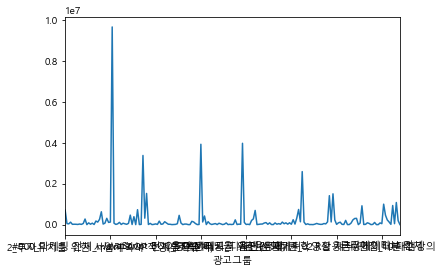

In [23]:
df_group['노출수'].plot()
plt.show()

- 명확한 패턴이 보일 수 있도록 데이터 시각화 진행
    1. as-is : index를 기준으로 출력 (그래프의 x축이 시리즈의 인덱스)
    2. to-be : 정렬된 value를 기준으로 출력
       
       2-1. 시리즈의 value를 수치 순서대로 오름차순 정렬
       
       2-2. 정렬된 데이ㅓㅌ의 형태대로 index재생성 후 시각화

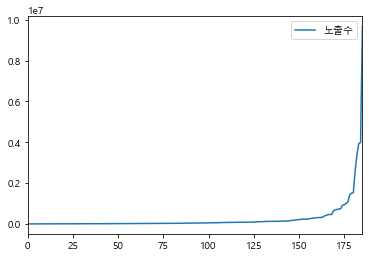

In [26]:
(((df_group['노출수'].sort_values()).reset_index()).drop('광고그룹',axis=1)).plot()
plt.show()

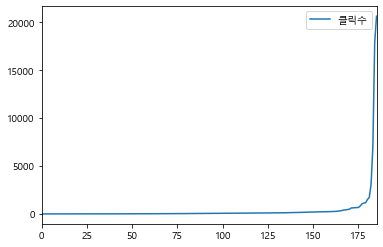

In [27]:
(((df_group['클릭수'].sort_values()).reset_index()).drop('광고그룹',axis=1)).plot()
plt.show()

## 중점관리 광고그룹/저효율 광고그룹
- 중점관리 광고그룹
    1. 상위 20%(노출수 80백분위수 이상)
    2. 상위 10%(클릭수 90 백분위수 이상)

In [28]:
imp = df_group['노출수']
clk = df_group['클릭수']

In [29]:
result=df_group[(imp>=imp.quantile(0.8))&(clk>=clk.quantile(0.9))]

In [30]:
result

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,709447,403.2,0.000568,862,347710
1. 코딩,630038,673.2,0.001069,2490,1676125
3. html,9683503,829.2,0.000086,1389,1151601
6. 파이썬,465292,488.4,0.001050,3192,1559107
AOP 전체_중복키워드_디자인,3388256,1174.8,0.000347,2120,2490708
AOP 전체_중복키워드_비지니스,1528568,634.8,0.000415,1762,1118678
ㅍAOP 전체_중복키워드_디자인(삭제),3936637,1051.2,0.000267,2561,2692591
마케팅 전체,3984480,421.2,0.000106,227,95546
올인원 패키지 : 데이터 분석 입문 온라인_파콘,742689,3079.2,0.004146,524,1614151


In [32]:
result.index

Index(['#000_마케팅 전체_main', '1. 코딩', '3. html', '6. 파이썬', 'AOP 전체_중복키워드_디자인',
       'AOP 전체_중복키워드_비지니스', 'ㅍAOP 전체_중복키워드_디자인(삭제)', '마케팅 전체',
       '올인원 패키지 : 데이터 분석 입문 온라인_파콘', '올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵',
       '올인원 패키지 : 업무자동화_VBA', '타이포그래피와 편집디자인', '프로그래밍 전체_파워컨텐츠_블록체인(삭제)'],
      dtype='object', name='광고그룹')

- 저효율 광고그룹 : 노출수, 클릭수 기준 상위의 키워드가 아닌데도 불구하고 비용이 많이 쓰이고 있는 광고그룹
    1. 노출수 80백분위수 미만
    2. 클릭수 90 백분위수 미만
    3. 총비용 60백분위수 이상
    4. 총비용 90백분위수 이상

In [33]:
cost = df_group['총비용(VAT포함,원)']

In [34]:
result = df_group[(imp<imp.quantile(0.8))&(clk<clk.quantile(0.9))&(cost>=cost.quantile(0.6))&(cost<cost.quantile(0.9))]

In [36]:
result.index

Index(['001.데이터분석/ 통계', '002.마케팅 입문', '003.퍼포먼스 마케팅', '1. 전체', '2. 프로그래밍',
       '5. 자료구조', 'AOP 전체_중복키워드_공통', 'AOP 전체_중복키워드_데이터사이언스',
       'AOP 전체_중복키워드_프로그래밍', 'JavaScript BOOT CAMP',
       'Python & Django를 활용한 웹 서비스_개발자', 'SEO/SEM 전략',
       'TensorFlow로 시작하는 딥러닝 입문', 'fin_camp_auction_6', 'ㅍAOP 전체_중복키워드_공통(삭제)',
       'ㅍAOP 전체_중복키워드_마케팅(삭제)', 'ㅍAOP 전체_중복키워드_프로그래밍(삭제)',
       'ㅍ올인원 패키지 : UX/UI 디자인 입문_연관검색어(삭제)', 'ㅍ올인원 패키지 : 브랜딩',
       '고객의 마음을 읽는 구글애널리틱스', '대기업을 이기는 브랜딩 전략', '마케터를 위한 데이터 부트캠프',
       '마케터를 위한 데이터 해석 실전', '마케팅 유치원', '마케팅KPI수립',
       '올인원 패키지 : 1인 쇼핑몰 시작하기_02.쇼핑몰구축', '올인원 패키지 : 1인 쇼핑몰_00.창업_MO',
       '올인원 패키지 : UX/UI 디자인 입문_연관검색어', '올인원 패키지 : 그로스해킹_5.마케팅 분석',
       '올인원 패키지 : 디지털 마케팅_1. 디지털 마케팅', '올인원 패키지 : 브랜딩',
       '올인원 패키지 : 업무자동화_1. 자동화', '올인원 패키지 : 업무자동화_4. VBA',
       '올인원 패키지 : 영상 제작/편집_9.유튜브/유튜버', '왕초보의 파이썬 웹 프로그래밍 CAMP',
       '코딩으로 여행하는 블록체인 서비스', '페이스북&인스타그램 마케팅 실전', '프로그래밍 유치원'],
      dtype='object', name='광고그룹')